<a href="https://colab.research.google.com/github/im-hjk/dankook_dacon/blob/master/dacon_num_feat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical_Features

# Imports

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive 
drive.mount('/content/drive')

from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import io
import pandas as pd
import seaborn as sns
import warnings

rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

data_dir = Path('/content/drive/My Drive/Colab Notebooks/input')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

df = pd.read_csv(feature_file, index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [ ]:
print(df.shape)
df.head()

(320000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   z           320000 non-null  float64
 1   redshift    320000 non-null  float64
 2   dered_u     320000 non-null  float64
 3   dered_g     320000 non-null  float64
 4   dered_r     320000 non-null  float64
 5   dered_i     320000 non-null  float64
 6   dered_z     320000 non-null  float64
 7   nObserve    320000 non-null  float64
 8   airmass_u   320000 non-null  float64
 9   class       320000 non-null  int64  
 10  d_dered_u   320000 non-null  float64
 11  d_dered_g   320000 non-null  float64
 12  d_dered_r   320000 non-null  float64
 13  d_dered_i   320000 non-null  float64
 14  d_dered_z   320000 non-null  float64
 15  d_dered_ig  320000 non-null  float64
 16  d_dered_zg  320000 non-null  float64
 17  d_dered_rz  320000 non-null  float64
 18  d_dered_iz  320000 non-null  float64
 19  d_

In [ ]:
df.describe()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
count,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,1.4861,1.1758,1.1163,-0.2236,-0.1498,-0.1203,-0.0219,-0.0059,-1.0747,-1.3578,0.7462,0.2831,-4.6527
std,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,0.9061,0.1163,0.9235,0.6967,13.3675,0.3630,28.0581,28.2757,17.7284,30.6874,35.4207,25.0444,7.6973
min,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,0.6931,1.0001,0.0000,-66.3661,-51.2796,-46.9576,-26.3505,-1968.6898,-10017.1270,-10017.2590,-17.7428,-16.6637,-38.1933
25%,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,0.6931,1.0882,0.0000,-0.2342,-0.1649,-0.1136,-0.0847,-0.0700,-1.2330,-1.5263,0.3072,0.0844,-3.2082
50%,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,1.0986,1.1793,1.0000,-0.1342,-0.1014,-0.0701,-0.0523,-0.0405,-0.9160,-1.1169,0.5338,0.2009,-0.9014
75%,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,1.7918,1.2275,2.0000,-0.0706,-0.0632,-0.0439,-0.0325,-0.0207,-0.6014,-0.6951,0.7146,0.2965,-0.3069
max,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,3.8067,2.0508,2.0000,42.2511,7556.3656,16.9807,13956.8178,13956.8178,21.8604,27.7746,10016.8755,10016.5565,2.7377


In [ ]:
target_col = 'class'
pred_col = 'pred'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'airmass_u', 'd_dered_u', 'd_dered_g', 'd_dered_r', 'd_dered_i', 'd_dered_z', 'd_dered_ig', 'd_dered_zg', 'd_dered_rz', 'd_dered_iz', 'd_obs_det']


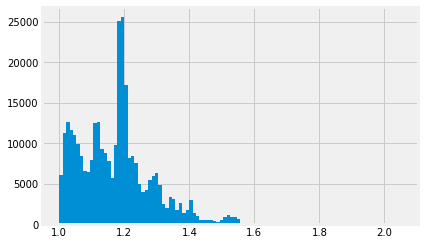

In [ ]:
df.airmass_u.hist(bins=100)

In [ ]:
sns.pairplot(data=df, vars=num_cols + [target_col], hue = "class")

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fef76140ea0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df.corr().style.background_gradient()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
z,1.0000,-0.0002,0.0140,0.5428,0.0189,0.9086,0.9190,0.0039,-0.0015,-0.0100,-0.0009,-0.5432,-0.0005,-0.9109,-0.8693,0.7406,0.7466,-0.9186,-0.3906,-0.0053
redshift,-0.0002,1.0000,-0.0076,-0.0002,-0.0030,-0.0001,-0.0002,-0.0100,0.0014,0.0738,0.0049,0.0006,0.0134,0.0002,0.0001,0.0000,-0.0001,0.0001,0.0002,0.0073
dered_u,0.0140,-0.0076,1.0000,0.0869,0.8405,0.0380,0.0232,0.2334,0.0883,-0.3379,0.1494,0.0063,0.1565,0.0011,0.0008,-0.0335,-0.0235,0.0117,0.0051,-0.2135
dered_g,0.5428,-0.0002,0.0869,1.0000,0.0887,0.7072,0.5001,0.0197,0.0059,-0.0304,0.0135,-0.9943,0.0144,-0.4739,-0.4702,-0.0030,-0.0021,-0.4966,0.0005,-0.0188
dered_r,0.0189,-0.0030,0.8405,0.0887,1.0000,0.0490,0.0315,0.2101,0.0839,-0.3413,0.1347,0.0059,0.1418,0.0017,0.0013,-0.0196,-0.0150,0.0100,0.0045,-0.1863
dered_i,0.9086,-0.0001,0.0380,0.7072,0.0490,1.0000,0.7075,0.0104,0.0018,-0.0183,0.0072,-0.7053,0.0075,-0.9570,-0.9497,0.7049,0.4071,-0.7058,0.0002,-0.0108
dered_z,0.9190,-0.0002,0.0232,0.5001,0.0315,0.7075,1.0000,0.0067,-0.0003,-0.0144,0.0043,-0.4991,0.0044,-0.6772,-0.6040,0.4990,0.8649,-0.9991,-0.7066,-0.0079
nObserve,0.0039,-0.0100,0.2334,0.0197,0.2101,0.0104,0.0067,1.0000,0.2499,-0.2363,-0.0251,-0.0005,-0.0251,0.0006,0.0006,-0.0050,-0.0037,0.0020,0.0010,-0.9364
airmass_u,-0.0015,0.0014,0.0883,0.0059,0.0839,0.0018,-0.0003,0.2499,1.0000,-0.0766,0.0306,0.0032,0.0322,0.0030,0.0026,-0.0034,-0.0037,0.0038,0.0022,-0.2476
class,-0.0100,0.0738,-0.3379,-0.0304,-0.3413,-0.0183,-0.0144,-0.2363,-0.0766,1.0000,0.1262,0.0049,0.1293,0.0026,0.0021,0.0047,0.0010,0.0002,0.0021,0.2133
